In [1]:
!ls -lrt /wrk-vakka/group/lmu/projects/n_track_ML/output/shap/ | tail -3

drwxr-sr-x 75 hajaalin grp-lmu-turso 41984 Jan 27 10:34 shap_inceptiontime
drwxr-sr-x  3 hajaalin grp-lmu-turso 33792 Feb  9 12:34 test_shap_all_20230209
drwxr-sr-x  3 hajaalin grp-lmu-turso 33792 Feb  9 12:47 shap_all_20230209


In [2]:
!ls -lrt /wrk-vakka/group/lmu/projects/n_track_ML/output/shap/shap_all_20230209

total 33
drwxr-sr-x 22 hajaalin grp-lmu-turso 33792 Feb  9 12:58 202302091244


In [3]:
import numpy as np
from pathlib import Path
import os 

# stored SHAP values from 21 repetitions
output_shap = Path('/wrk-vakka/group/lmu/projects/n_track_ML/output/shap/shap_all_20230209/202302091244')
repetitions = os.listdir(output_shap)
repetition0 = repetitions[0]
print(repetitions)

['273037668', '273037662', '273037657', '273037665', '273037661', '273037653', '273037659', '273037654', '273037666', '273037656', '273037664', '273037663', '273037669', '273037651', '273037670', '273037655', '273037667', '273037660', '273037658', '273037652']


In [4]:
# each subdirectory contains lists with 4 cross-validation runs
os.listdir(output_shap / repetition0)

['list_idx_train.npy',
 'list_X_test.npy',
 'list_shap_deep.npy',
 'list_idx_test.npy',
 'features.npy',
 'list_shap_grad.npy',
 'list_accuracy.npy']

In [5]:
def load_shap_values(output_shap):
    list_idx_train = np.load(output_shap / 'list_idx_train.npy', allow_pickle=True)
    list_idx_test = np.load(output_shap / 'list_idx_test.npy', allow_pickle=True)
    list_X_test = np.load(output_shap / 'list_X_test.npy', allow_pickle=True)
    list_shap_deep = np.load(output_shap / 'list_shap_deep.npy', allow_pickle=True)
    list_shap_grad = np.load(output_shap / 'list_shap_grad.npy', allow_pickle=True)
    list_acc = np.load(output_shap / 'list_accuracy.npy', allow_pickle=True)
    features = np.load(output_shap / 'features.npy', allow_pickle=True)
    
    return list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features

In [6]:
list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_accuracy, features =\
load_shap_values(output_shap / repetition0)

print(list_accuracy.mean())
print(list_idx_test.shape)
print(list_idx_test[0].shape)
#print(list_idx_test[0])
print(list_shap_deep.shape)
print(list_shap_deep[0].shape)
#print(list_shap_deep[0][0])


0.5594901084031518
(4,)
(74,)
(4,)
(74, 28, 5)


In [7]:
# combine all repetitions
lists_idx_test = []
lists_X_test = []
lists_shap_deep = []
lists_shap_grad = []
lists_acc = []
for r in os.listdir(output_shap):
    output = output_shap / r
    
    list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features =\
    load_shap_values(output)

    lists_idx_test.extend(list_idx_test)
    lists_X_test.extend(list_X_test)
    lists_shap_deep.extend(list_shap_deep)
    lists_shap_grad.extend(list_shap_grad)
    lists_acc.append(list_acc)
    
    #print(r)
    #print(np.mean(list_acc))
    #print(list_acc.shape)
    
list_idx_test = np.concatenate(lists_idx_test)
list_X_test = np.concatenate(lists_X_test)
list_shap_deep = np.concatenate(lists_shap_deep)
list_shap_grad = np.concatenate(lists_shap_grad)

list_acc = np.concatenate(lists_acc)
print(list_acc.shape)
print(np.mean(list_acc))


(80,)
0.549094184322707


In [8]:
print(list_idx_test.shape)
print(list_X_test.shape)
print(list_shap_deep.shape)
print(list_shap_grad.shape)


(5780,)
(5780, 28, 5)
(5780, 28, 5)
(5780, 28, 5)


In [9]:
list_idx_test

array([  2,   3,  11, ..., 275, 281, 283])

In [10]:
unique, counts = np.unique(list_idx_test, return_counts=True)
print(len(unique))
print(min(unique))
counts

289
0


array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [11]:
list_shap_deep[:,0,0]

array([-0.00891335,  0.00284136,  0.00161694, ..., -0.00246226,
       -0.001164  , -0.00044911])

In [12]:
# pick repetitions of a single instance (time series)
idx_1 = list_idx_test==1
shap_1 = list_shap_deep[idx_1] 
print(shap_1.shape)

# average over repetitions and timepoint (leaves features)
np.mean(shap_1, axis=(0,1))

(20, 28, 5)


array([4.23061541e-03, 5.90103873e-04, 1.02210291e-04, 2.16561214e-03,
       1.89245408e-05])

In [13]:
X_test_f = []
shap_deep_f = []
shap_grad_f = []
# loop over instances
for i in range(len(unique)):
    #print(i)
    idx_i = list_idx_test==i
    X_test_i = list_X_test[idx_i]
    shap_deep_i = list_shap_deep[idx_i]
    shap_grad_i = list_shap_grad[idx_i]
    # average over repetitions and time steps
    X_test_f.append(np.mean(X_test_i, axis=(0,1)))
    shap_deep_f.append(np.mean(shap_deep_i, axis=(0,1)))
    shap_grad_f.append(np.mean(shap_grad_i, axis=(0,1)))
    
X_test_f = np.array(X_test_f)
shap_deep_f = np.array(shap_deep_f)
shap_grad_f = np.array(shap_grad_f)

#X_test_f = np.concatenate(X_test_f, axis=0)
#shap_deep_f = np.concatenate(shap_deep_f, axis=0)
#shap_grad_f = np.concatenate(shap_grad_f, axis=0)

print(X_test_f.shape)
print(shap_deep_f.shape)
print(shap_grad_f.shape)


(289, 5)
(289, 5)
(289, 5)


In [14]:
X_test_f[:5]

array([[ 3.34347648, -0.41432197,  0.35914447, -1.30504795,  0.29874308],
       [ 2.44298983, -0.41432197,  0.35914447,  0.54835229,  0.03224441],
       [ 1.01480341,  1.12483274,  0.63522134,  2.85743383,  0.19863621],
       [ 0.61303623,  1.12483274,  0.63522134,  2.59727105, -0.15837818],
       [ 0.036109  , -0.55622263, -0.68136971, -0.94121477, -0.10342926]])

In [15]:
shap_deep_f[:5]

array([[ 4.68337262e-03,  8.12725806e-04, -2.73931102e-04,
        -3.94815877e-03,  7.90311461e-04],
       [ 4.23061541e-03,  5.90103873e-04,  1.02210291e-04,
         2.16561214e-03,  1.89245408e-05],
       [ 3.72342959e-03,  1.29928029e-03,  7.75726615e-05,
         8.24183998e-03, -1.08113953e-02],
       [-1.37100813e-03,  3.21185736e-03, -1.07030071e-04,
         7.31606730e-04, -3.31854913e-03],
       [-1.86939820e-03,  3.89791908e-04, -6.70987723e-04,
         1.45694093e-03, -1.09481803e-03]])

In [16]:
import pandas as pd
import shap

from load_data_tsc import fsets

features = fsets['all'][2:]
print(features)

/proj/group/lmu/software/Miniconda3/py38_4.12.0/envs/tsc/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xscpvbdz because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


sklearn 1.1.1
sktime 0.10.1
['D', 'A', 'P', 'Dist', 'dt']


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


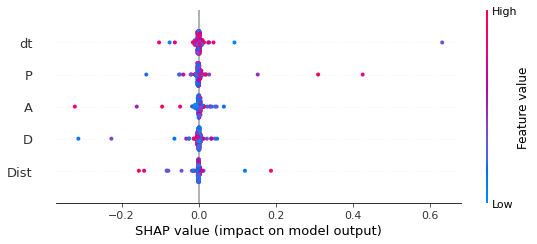

In [17]:
import matplotlib.pyplot as plt 

X_test_f = pd.DataFrame(X_test_f, columns=features)

shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer')


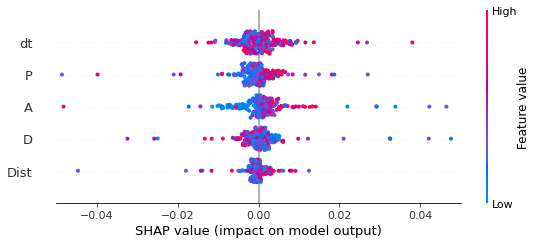

In [18]:
shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer, xlim', show=False)
ax = plt.gca()

# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(-0.05, 0.05) 
plt.show()


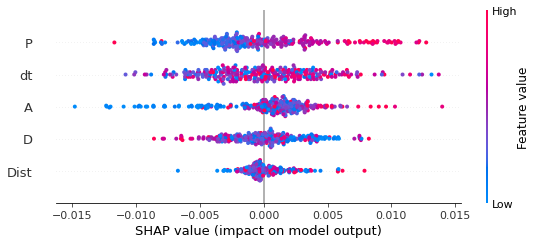

In [19]:
shap.summary_plot(shap_grad_f, features=X_test_f, title='GradientExplainer')